In [16]:
import numpy as np
import polars as pl
import matplotlib.pyplot as pt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import pickle

In [3]:
file = pl.read_csv("../../data/preprocessedData.csv")
file.head(3)

temp,feelsLike,pressure,humidity,clouds,windSpeed,windDir,gustSpeed,result
f64,f64,f64,f64,f64,f64,f64,f64,i64
35.6,36.9,978.0,35.0,100.0,3.05,220.0,4.0,1
34.4,35.3,979.0,37.0,100.0,0.78,144.0,2.0,1
33.3,34.8,981.0,42.0,100.0,2.02,78.0,2.02,1


In [4]:
x = file.drop('result')
y = file['result']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=99)

In [10]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [11]:
model = DecisionTreeClassifier(random_state=99)

model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=99)

In [12]:
y_pred = model.predict(x_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}\n")
print(f"confusion matrix:\ng    {confusion_matrix}\n")
print(f"classification report: {classification_report}")

Accuracy: 0.8061377245508982

confusion matrix:
g    [[509 166]
 [ 93 568]]

classification report:               precision    recall  f1-score   support

           0       0.85      0.75      0.80       675
           1       0.77      0.86      0.81       661

    accuracy                           0.81      1336
   macro avg       0.81      0.81      0.81      1336
weighted avg       0.81      0.81      0.81      1336



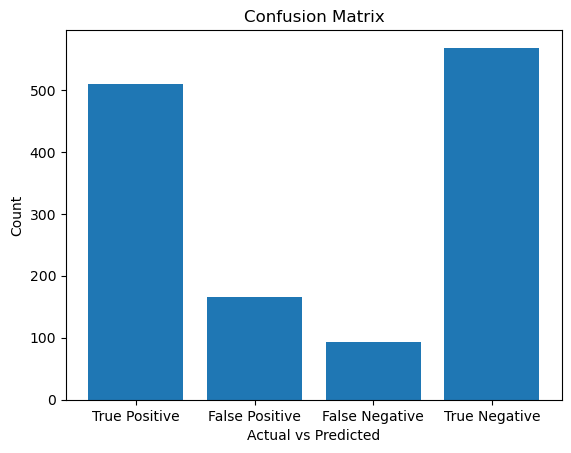

In [14]:
labels = np.array(['True Positive', 'False Positive', 'False Negative', 'True Negative'])
values = np.array([confusion_matrix[0][0], confusion_matrix[0][1], confusion_matrix[1][0], confusion_matrix[1][1]])

pt.bar(labels, values)
pt.xlabel("Actual vs Predicted")
pt.ylabel("Count")
pt.title("Confusion Matrix")
pt.show()

In [15]:
classification_dict = {
  "original": y_test, 
  "predicted": y_pred
}

classification_df = pl.DataFrame(classification_dict)

classification_df.write_csv("classificaion_report.csv")

In [19]:
with open("model.pickle", "wb") as file:
  pickle.dump(model, file)